In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_excel('heat disease 2.xlsx')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [5]:
n_cols = {'cp':'Chest Pain Type (CP)',
          'trestbps':'Resting Blood Pressure (trestbps)',
          'chol':'Serum Cholestoral (chol) mg/dl',
          'fbs':  'Fasting Blood Sugar (fbs) > 120 mg/dl',
          'restecg': 'Resting Electrocardiographic Results (restecg)',
          'thalach' : 'Maximum Heart Rate Achieved (thalach)',
          'exang': 'Exercise Induced Angina (exang)',
          'oldpeak' : 'ST depression (oldpeak)' ,
          'slope' : 'Slope of the ST Segment (slope)',
          'thal' : 'Thal'}

In [6]:
df.rename(columns=n_cols,inplace=True)

In [7]:
df

,age,sex,Chest Pain Type (CP),Resting Blood Pressure (trestbps),Serum Cholestoral (chol) mg/dl,Fasting Blood Sugar (fbs) > 120 mg/dl,Resting Electrocardiographic Results (restecg),thalch,Exercise Induced Angina (exang),ST depression (oldpeak),Slope of the ST Segment (slope),Thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [8]:
df.shape

(908, 13)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   age                                             908 non-null    int64  
 1   sex                                             908 non-null    object 
 2   Chest Pain Type (CP)                            908 non-null    object 
 3   Resting Blood Pressure (trestbps)               908 non-null    int64  
 4   Serum Cholestoral (chol) mg/dl                  908 non-null    int64  
 5   Fasting Blood Sugar (fbs) > 120 mg/dl           908 non-null    bool   
 6   Resting Electrocardiographic Results (restecg)  908 non-null    object 
 7   thalch                                          908 non-null    int64  
 8   Exercise Induced Angina (exang)                 908 non-null    object 
 9   ST depression (oldpeak)                    

In [10]:
df.isna().sum()

age                                                0
sex                                                0
Chest Pain Type (CP)                               0
Resting Blood Pressure (trestbps)                  0
Serum Cholestoral (chol) mg/dl                     0
Fasting Blood Sugar (fbs) > 120 mg/dl              0
Resting Electrocardiographic Results (restecg)     0
thalch                                             0
Exercise Induced Angina (exang)                    0
ST depression (oldpeak)                           62
Slope of the ST Segment (slope)                    0
Thal                                               0
num                                                0
dtype: int64

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(907, 13)

In [13]:
#  ST depression (oldpeak) have missing values
# imputing the nan values with median
oldpeak_mean=df['ST depression (oldpeak)'].median()
df['ST depression (oldpeak)']=df['ST depression (oldpeak)'].fillna(oldpeak_mean)

In [14]:
numerical_features=[feature for feature in df.columns if (df[feature].dtype != 'O' ) & (feature !='num') & (feature != 'Fasting Blood Sugar (fbs) > 120 mg/dl') ]
numerical_features

['age',
 'Resting Blood Pressure (trestbps)',
 'Serum Cholestoral (chol) mg/dl',
 'thalch',
 'ST depression (oldpeak)']

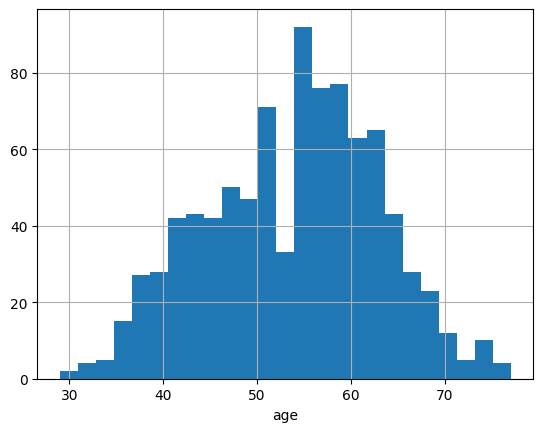

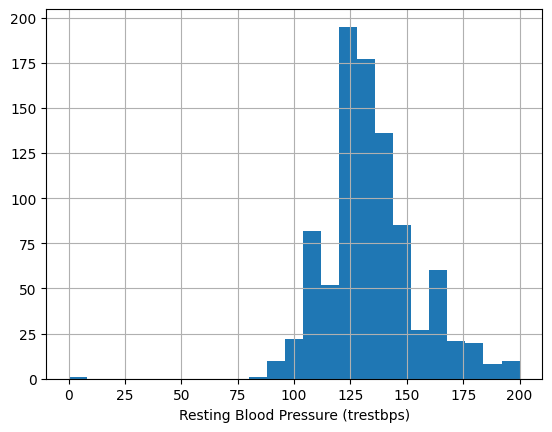

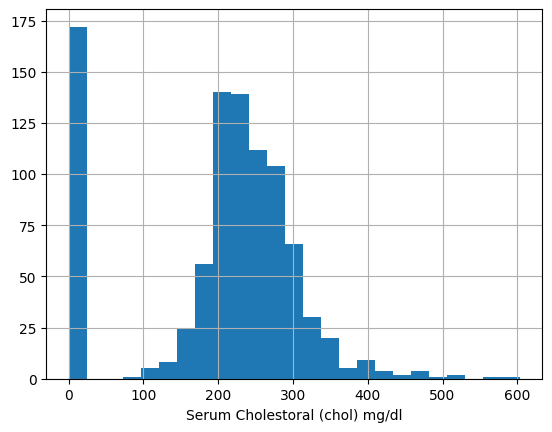

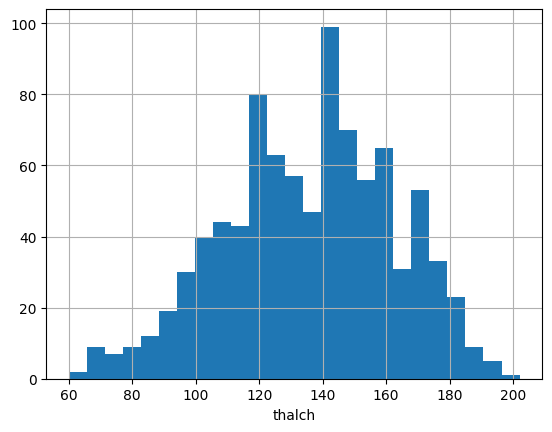

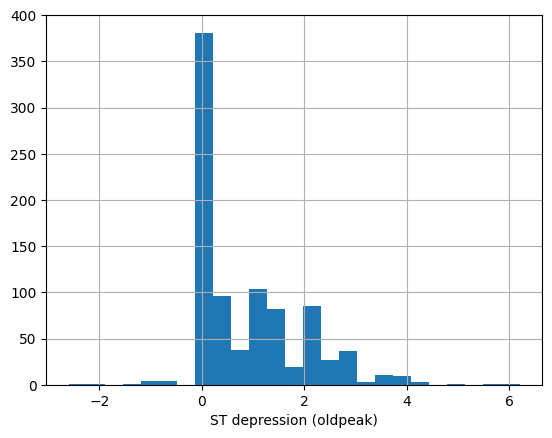

In [15]:
for i in numerical_features[:6]:
    data=df.copy()
    data[i].hist(bins=25)
    plt.xlabel(i)
    plt.show()

In [16]:
#Clculate age
minAge=min(df.age)
maxAge=max(df.age)
meanAge=df.age.mean()
print("min =",minAge ,"max =", maxAge , "mean =",meanAge)

min = 29 max = 77 mean = 53.78721058434399


([<matplotlib.patches.Wedge at 0x226156ada50>,
 [Text(1.1668681584523644, 0.28003339227668556, 'young ages'),
  Text(-0.09756907614581135, 1.1960268706764297, 'middle ages'),
  Text(-0.18423095586112323, -1.1857735681412778, 'old ages')],
 [Text(0.6806730924305457, 0.16335281216139988, '7.5%'),
  Text(-0.05691529441838995, 0.6976823412279172, '37.6%'),
  Text(-0.1074680575856552, -0.6917012480824118, '54.9%')])

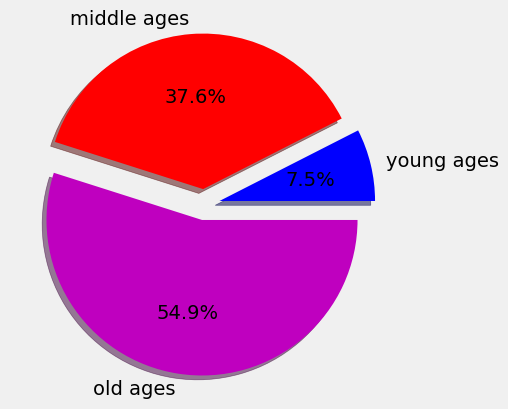

In [17]:
young=df[(df.age>=29) & (df.age<40)]
middle=df[(df.age>=40) & (df.age<54)]
old=df[df.age>=54]
colors=['b','r','m']
plt.style.use('fivethirtyeight')
plt.pie([len(young),len(middle),len(old)],labels=['young ages','middle ages','old ages'],colors=colors,explode=[0.1,0.1,0.1],shadow=True, autopct='%1.1f%%')

In [18]:
## we can see that there is a lot of old age peoples

<Axes: >

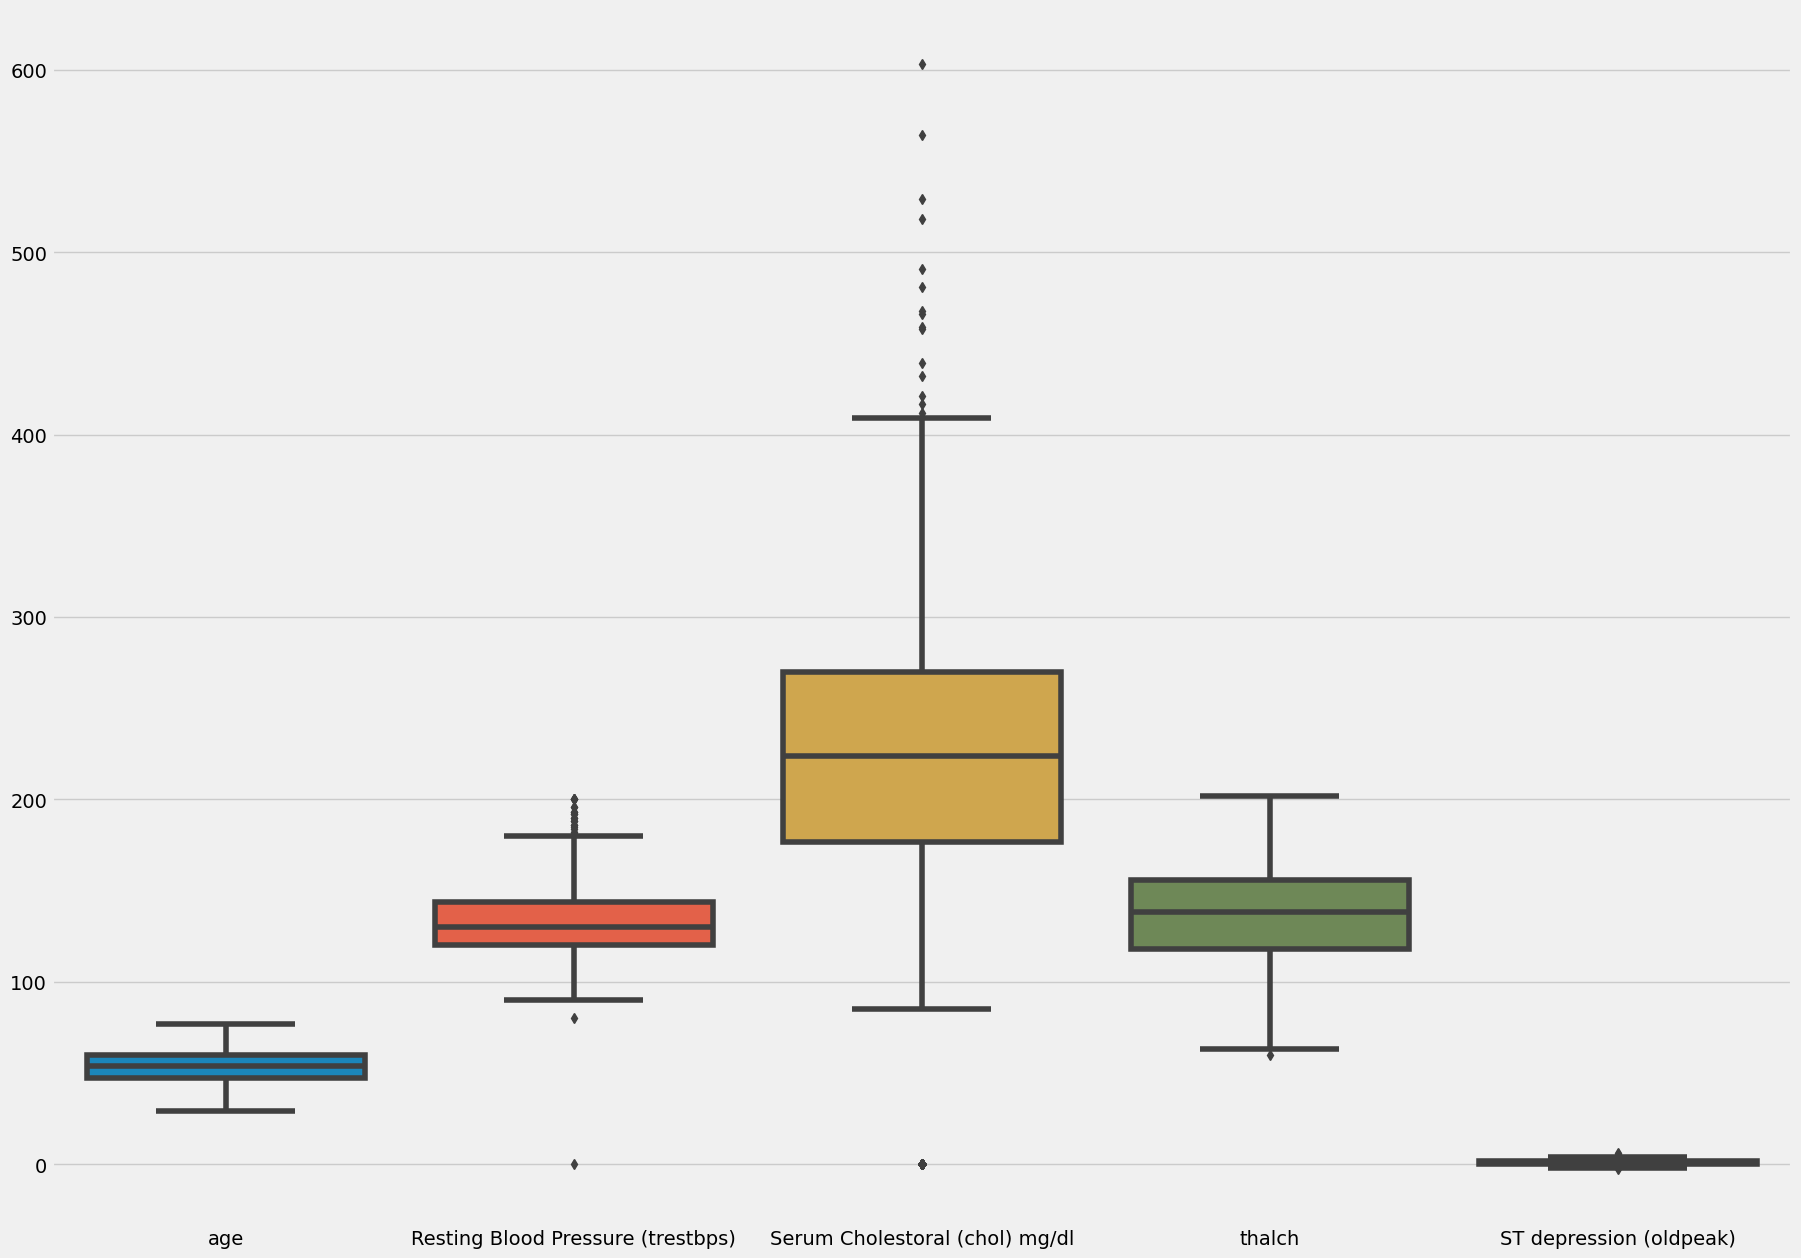

In [22]:
plt.figure(figsize=(20,15))
sns.boxplot(df[numerical_features])

In [26]:
corr=df[numerical_features].corr()
corr

,age,Resting Blood Pressure (trestbps),Serum Cholestoral (chol) mg/dl,thalch,ST depression (oldpeak)
age,1.000000,0.253709,-0.100059,-0.327868,0.218461
Resting Blood Pressure (trestbps),0.253709,1.000000,0.117392,-0.132841,0.135775
Serum Cholestoral (chol) mg/dl,-0.100059,0.117392,1.000000,0.198074,0.032357
thalch,-0.327868,-0.132841,0.198074,1.000000,-0.113296
ST depression (oldpeak),0.218461,0.135775,0.032357,-0.113296,1.000000


<Axes: >

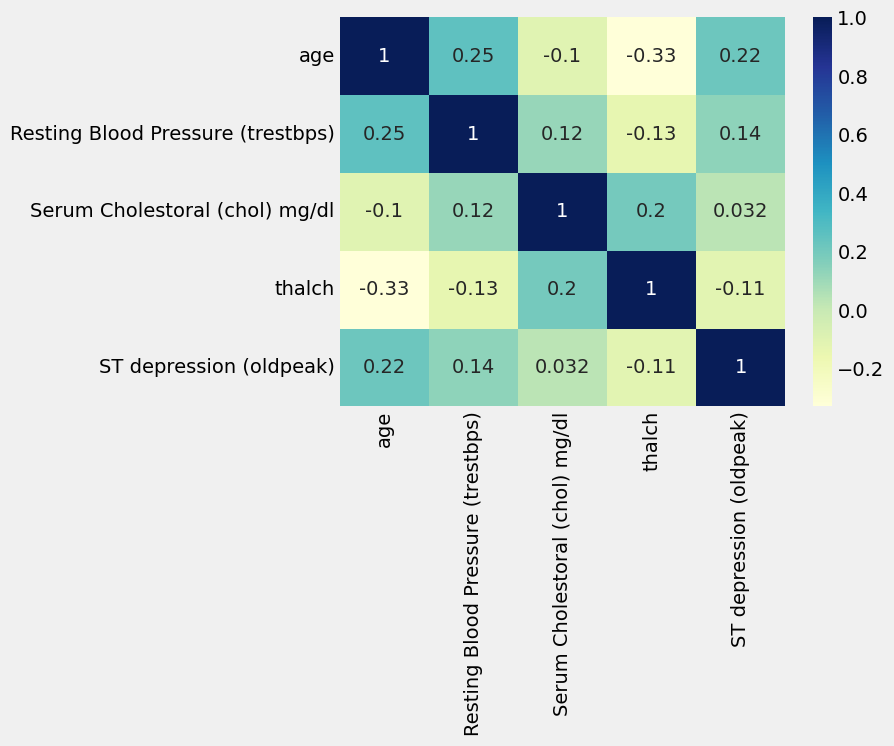

In [31]:
sns.heatmap(corr,cmap='YlGnBu',annot=True)

In [32]:
df

,age,sex,Chest Pain Type (CP),Resting Blood Pressure (trestbps),Serum Cholestoral (chol) mg/dl,Fasting Blood Sugar (fbs) > 120 mg/dl,Resting Electrocardiographic Results (restecg),thalch,Exercise Induced Angina (exang),ST depression (oldpeak),Slope of the ST Segment (slope),Thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,0.5,downsloping,fixed defect,4


In [37]:
df['Thal'].unique()

array(['fixed defect', 'normal', 'reversable defect'], dtype=object)

In [38]:
# label encoding categorical values other than Fasting Blood Sugar (fbs) > 120 mg/dl and Exercise Induced Angina (exang)

In [40]:
categorical_features=[feature for feature in df.columns if (df[feature].dtype == 'O' ) & (feature !='num') & (feature != 'Fasting Blood Sugar (fbs) > 120 mg/dl') &  (feature != 'Exercise Induced Angina (exang)') ]
categorical_features

['sex',
 'Chest Pain Type (CP)',
 'Resting Electrocardiographic Results (restecg)',
 'Slope of the ST Segment (slope)',
 'Thal']

In [41]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [43]:
label=LabelEncoder()

In [46]:
for feature in categorical_features:
    df[feature]=label.fit_transform(df[feature])

In [47]:
df

,age,sex,Chest Pain Type (CP),Resting Blood Pressure (trestbps),Serum Cholestoral (chol) mg/dl,Fasting Blood Sugar (fbs) > 120 mg/dl,Resting Electrocardiographic Results (restecg),thalch,Exercise Induced Angina (exang),ST depression (oldpeak),Slope of the ST Segment (slope),Thal,num
0,63,1,3,145,233,True,0,150,False,2.3,0,0,0
1,41,1,1,135,203,False,1,132,False,0.0,1,0,0
2,57,1,0,140,192,False,1,148,False,0.4,1,0,0
3,52,1,3,118,186,False,0,190,False,0.0,1,0,0
4,57,1,0,110,201,False,1,126,True,1.5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,False,1,120,False,1.5,2,2,4
904,62,1,0,166,170,False,2,120,True,3.0,1,2,4
905,56,1,2,170,0,False,0,123,True,2.5,0,1,4
906,56,1,2,144,208,True,2,105,TURE,0.5,0,0,4


In [50]:
df['Exercise Induced Angina (exang)'].value_counts()

Exercise Induced Angina (exang)
False    516
True     336
TURE      36
FALSE     19
Name: count, dtype: int64

In [58]:
df['Exercise Induced Angina (exang)']=df['Exercise Induced Angina (exang)'].replace({'True':True,'False':False,'TURE':'True','FALSE':False})

In [59]:
df['Exercise Induced Angina (exang)'].value_counts()

Exercise Induced Angina (exang)
False    535
True     372
Name: count, dtype: int64

In [64]:
df['Exercise Induced Angina (exang)']=label.fit_transform(df['Exercise Induced Angina (exang)'])
df['Fasting Blood Sugar (fbs) > 120 mg/dl']=label.fit_transform(df['Fasting Blood Sugar (fbs) > 120 mg/dl'])

In [65]:
df

,age,sex,Chest Pain Type (CP),Resting Blood Pressure (trestbps),Serum Cholestoral (chol) mg/dl,Fasting Blood Sugar (fbs) > 120 mg/dl,Resting Electrocardiographic Results (restecg),thalch,Exercise Induced Angina (exang),ST depression (oldpeak),Slope of the ST Segment (slope),Thal,num
0,63,1,3,145,233,1,0,150,0,2.3,0,0,0
1,41,1,1,135,203,0,1,132,0,0.0,1,0,0
2,57,1,0,140,192,0,1,148,0,0.4,1,0,0
3,52,1,3,118,186,0,0,190,0,0.0,1,0,0
4,57,1,0,110,201,0,1,126,1,1.5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,0,1,120,0,1.5,2,2,4
904,62,1,0,166,170,0,2,120,1,3.0,1,2,4
905,56,1,2,170,0,0,0,123,1,2.5,0,1,4
906,56,1,2,144,208,1,2,105,1,0.5,0,0,4


In [66]:
## now we have to standardize the data

In [67]:
from sklearn.preprocessing import StandardScaler


In [69]:
std_scaler=StandardScaler()
df.columns

Index(['age', 'sex', 'Chest Pain Type (CP)',
       'Resting Blood Pressure (trestbps)', 'Serum Cholestoral (chol) mg/dl',
       'Fasting Blood Sugar (fbs) > 120 mg/dl',
       'Resting Electrocardiographic Results (restecg)', 'thalch',
       'Exercise Induced Angina (exang)', 'ST depression (oldpeak)',
       'Slope of the ST Segment (slope)', 'Thal', 'num'],
      dtype='object')

In [70]:

col = ['age', 'sex', 'Chest Pain Type (CP)',
       'Resting Blood Pressure (trestbps)', 'Serum Cholestoral (chol) mg/dl',
       'Fasting Blood Sugar (fbs) > 120 mg/dl',
       'Resting Electrocardiographic Results (restecg)', 'thalch',
       'Exercise Induced Angina (exang)', 'ST depression (oldpeak)',
       'Slope of the ST Segment (slope)', 'Thal']
df[col] = std_scaler.fit_transform(df[col])
df.head()

,age,sex,Chest Pain Type (CP),Resting Blood Pressure (trestbps),Serum Cholestoral (chol) mg/dl,Fasting Blood Sugar (fbs) > 120 mg/dl,Resting Electrocardiographic Results (restecg),thalch,Exercise Induced Angina (exang),ST depression (oldpeak),Slope of the ST Segment (slope),Thal,num
0,1.006097,0.514775,2.322491,0.568184,0.281318,1.975526,-1.560916,0.523285,-0.833863,1.353255,-1.676279,-1.615301,0
1,-1.396447,0.514775,0.233746,0.077848,0.013691,-0.506194,0.015644,-0.148399,-0.833863,-0.816467,-0.226913,-1.615301,0
2,0.350858,0.514775,-0.810626,0.323016,-0.084439,-0.506194,0.015644,0.448654,-0.833863,-0.439124,-0.226913,-1.615301,0
3,-0.195175,0.514775,2.322491,-0.755723,-0.137964,-0.506194,-1.560916,2.015918,-0.833863,-0.816467,-0.226913,-1.615301,0
4,0.350858,0.514775,-0.810626,-1.147992,-0.004151,-0.506194,0.015644,-0.372294,1.199238,0.598569,-0.226913,-1.615301,0


In [72]:
X=df.drop('num',axis=1)
Y=df['num']

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [77]:
classifier=DecisionTreeClassifier(criterion='entropy',max_depth=5)

In [78]:
model=classifier.fit(X_train,y_train)

In [81]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score

# Evaluate the model on the testing set
y_pred = model.predict(X_test)

In [91]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [92]:
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Accuracy: 0.5604395604395604
Precision: 0.5043087808417996
Recall: 0.5604395604395604
F1 Score: 0.5276283770210896


In [93]:
from sklearn.model_selection import GridSearchCV

In [94]:
# Define the grid of hyperparameters to search
grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'criterion': ['entropy', 'gini']
}


In [96]:
# Create a DecisionTreeClassifier instance
dt_clf = DecisionTreeClassifier()

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=dt_clf, param_grid=grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print('Best Hyperparameters:')
print(best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the testing data
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)


Best Hyperparameters:
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}
Accuracy: 0.5604395604395604
Precision: 0.5043087808417996
Recall: 0.5604395604395604
F1 Score: 0.5276283770210896


In [99]:
from sklearn import tree

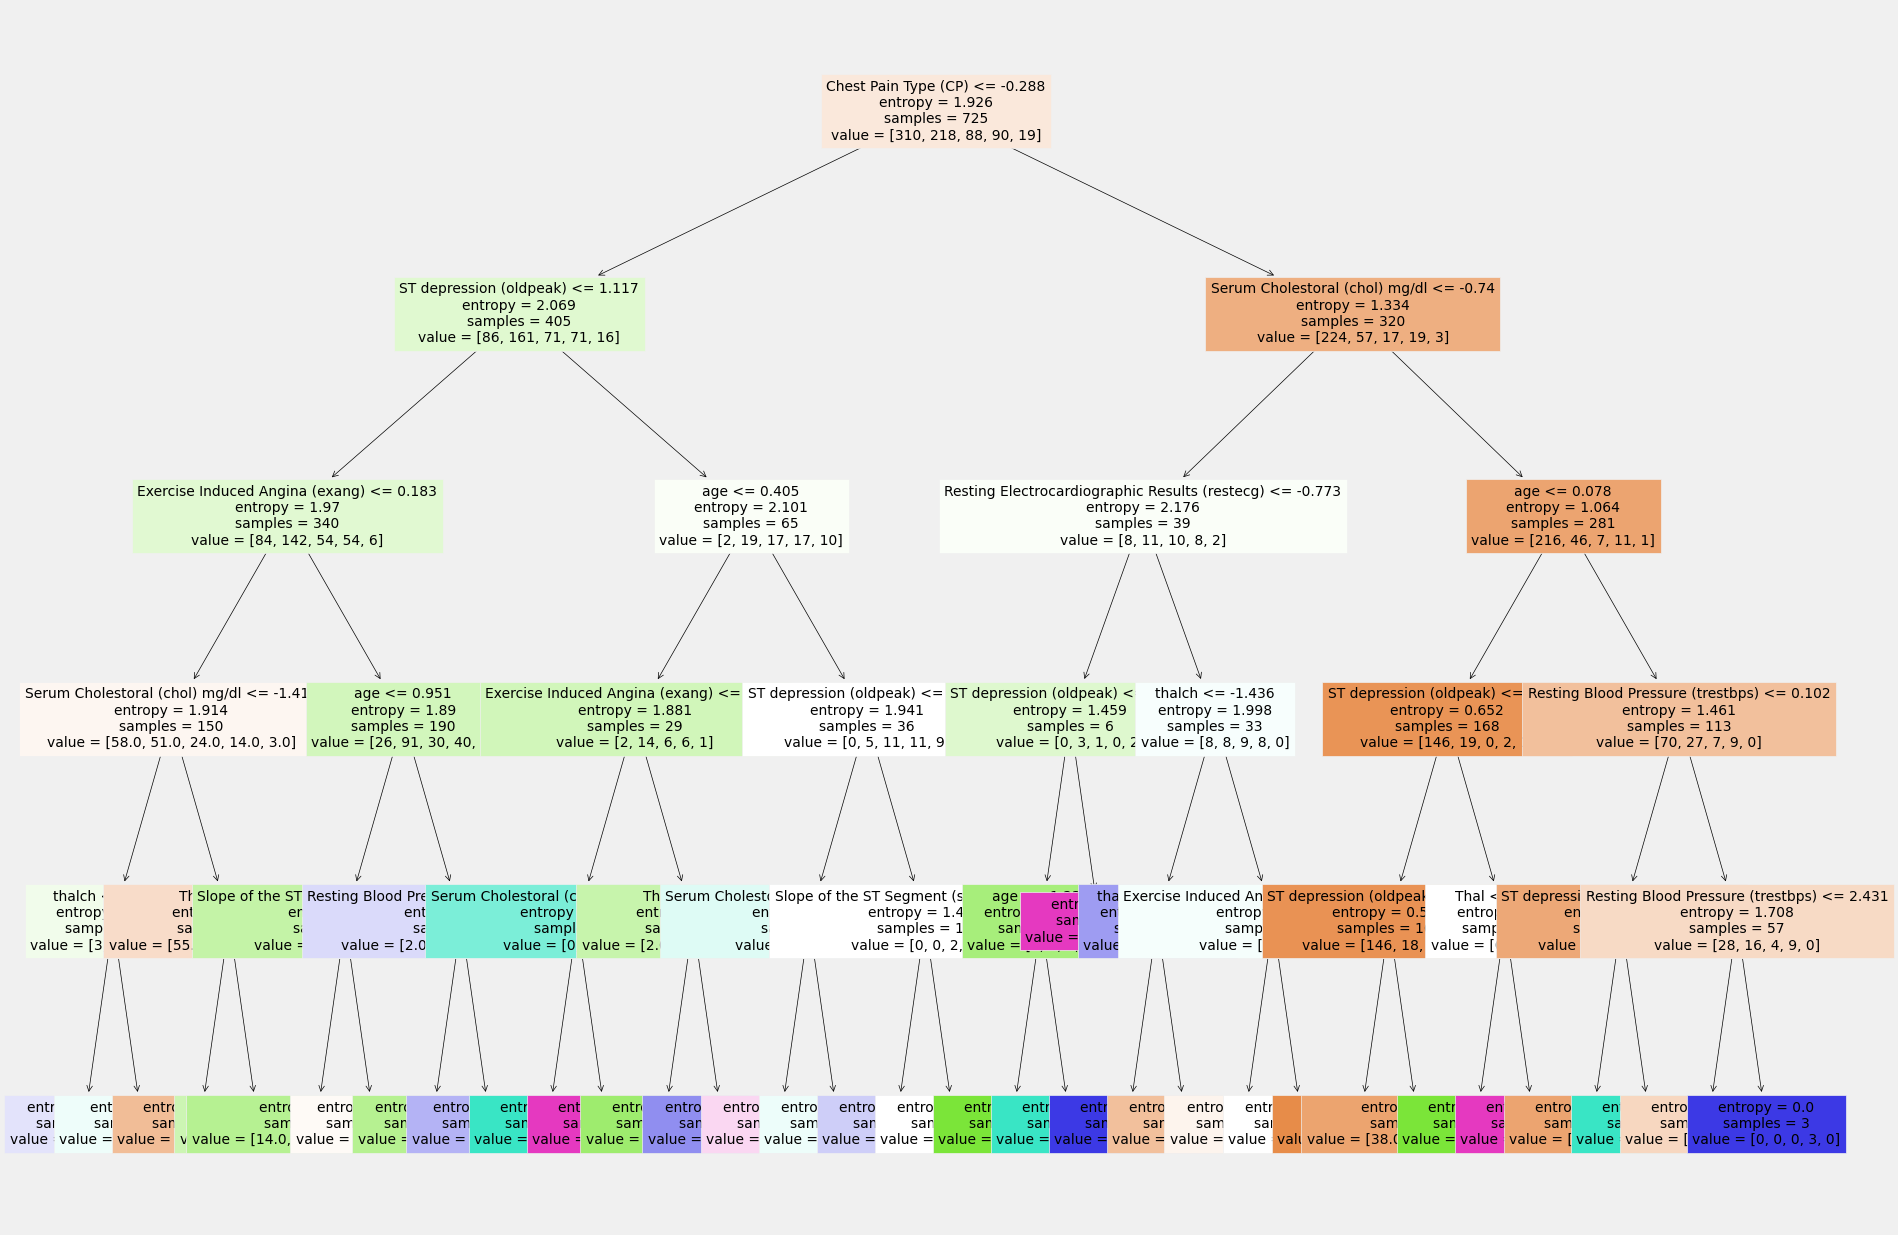

In [106]:
plt.figure(figsize=(20,15))
tree.plot_tree(best_model,feature_names=X.columns,fontsize=10,filled=True)
plt.show()


In [109]:
# Evaluate the model performance using the obtained metrics

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Precision
precision = precision_score(y_test, y_pred, average='weighted')
print('Precision:', precision)

# Recall
recall = recall_score(y_test, y_pred, average='weighted')
print('Recall:', recall)

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print('F1 Score:', f1)



Accuracy: 0.5604395604395604
Precision: 0.5043087808417996
Recall: 0.5604395604395604
F1 Score: 0.5276283770210896


1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

max_depth: This hyperparameter controls the maximum depth of the decision tree. A higher max_depth allows the tree to make more complex decisions, potentially capturing more intricate patterns in the data. However, deeper trees are more prone to overfitting, so setting an appropriate max_depth is crucial to balance model complexity and generalization.

min_samples_split: This hyperparameter determines the minimum number of samples required to split an internal node. If the number of samples at a node is less than min_samples_split, the node will not be split, effectively controlling the granularity of the splits in the tree. Setting a higher min_samples_split can prevent the model from capturing noise in the data and reduce overfitting.

min_samples_leaf: This hyperparameter sets the minimum number of samples required to be at a leaf node. It acts as a regularization parameter by controlling the size of the leaves. A higher min_samples_leaf can prevent the tree from becoming too specific to the training data and improve its ability to generalize to unseen data.

max_features: This hyperparameter determines the maximum number of features to consider when looking for the best split. Limiting the number of features can help reduce the computational cost and the risk of overfitting, especially in high-dimensional datasets.

criterion: This hyperparameter specifies the function used to measure the quality of a split. The two most common criteria are "gini" for the Gini impurity and "entropy" for information gain. Both criteria aim to maximize the homogeneity of the target variable within each node, but they differ in their calculation methods.

2. What is the difference between the Label encoding and One-hot encoding?


Label Encoding:

Label encoding assigns a unique integer to each category in the categorical variable.
It is typically used for ordinal categorical variables, where the categories have a natural ordering.
The integers assigned to the categories are usually sequential starting from 0 or 1.
Example: Consider a categorical variable "Size" with categories ['Small', 'Medium', 'Large']. Label encoding might transform it to [0, 1, 2].
One-Hot Encoding:

One-hot encoding creates a binary representation of categorical variables, where each category is represented by a binary vector.
It creates a new binary feature for each unique category in the original variable.
Each binary feature indicates the presence (1) or absence (0) of a particular category.
It is suitable for nominal categorical variables, where categories have no inherent order.
Example: Using the same "Size" variable, one-hot encoding would create three binary features: [1, 0, 0] for 'Small', [0, 1, 0] for 'Medium', and [0, 0, 1] for 'Large'.